This is a notebook for putting all of the project into one place. 
This is where we should be testing and training our models as well as putting
together the final result. 

In [10]:
#Import all necessary packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras

from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

ImportError: cannot import name 'Adam' from 'tensorflow.python.keras.optimizers' (/Users/chloegriffin/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizers.py)

2022-11-28 11:33:31.054437: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-28 11:33:31.328335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 11:33:31.328417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-28 11:33:31.372072: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


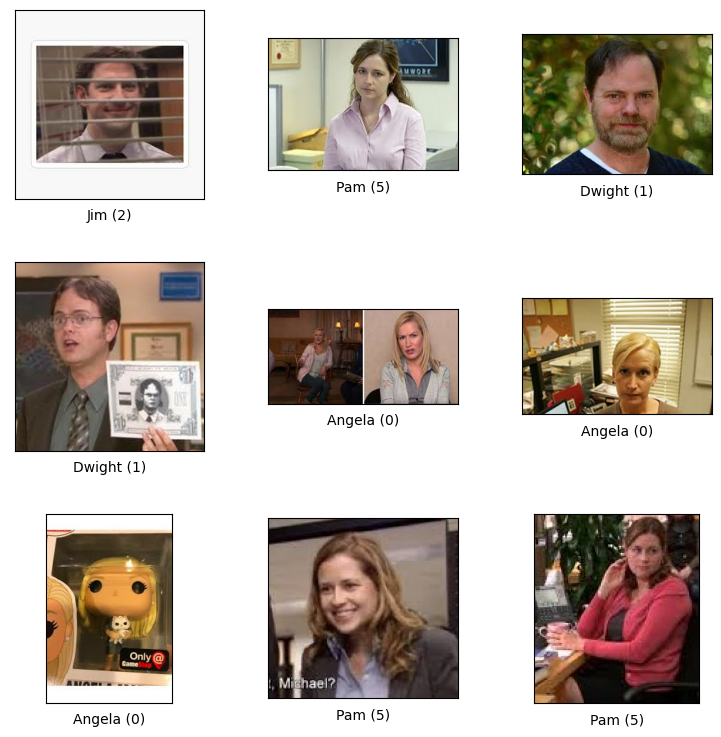

/Users/chloegriffin/Deep Learning Course/Regional_Programmer/Code/preprocessing.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X0, X1 = [np.array([r[0] for r in tfds.as_numpy(D)]) for D in (D0, D1)]


In [2]:
#Import the data for character classification
import preprocessing
from preprocessing import get_characters

#Set file path as your directory to the folder containing Office Image dataset, and show examples
file_path = '../data/characters/'
X0, Y0, X1, Y1, D0, D1= get_characters(file_path)

In [3]:
print("The shape of our training images is ", np.shape(X0), " with label shape ", np.shape(Y0))
print("The shape of our testing images is ", np.shape(X1), " with label shape ", np.shape(Y1))

The shape of our training images is  (1268,)  with label shape  (1268,)
The shape of our testing images is  (311,)  with label shape  (311,)


In [5]:
import recognition
from recognition import get_resnet

#Get Pretrained Resnet Model with a few extra layers for additional training
#This is pretrained on ImageNet

resnet_model = get_resnet()

#View the layers of the pretrained model (View trainable versus non-trainable)
#resnet_model.summary()

In [8]:
#Train the new model with our data
#resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) 
resnet_model.compile(
        optimizer=tf.keras.optimizers.Adam(0.002),  ## feel free to change
        loss="categorical_crossentropy",  ## do not change loss/metrics
        metrics=["categorical_accuracy"],
    )
history = resnet_model.fit(D0, epochs=10) #Add back in validation data between D0 and epochs: validation_data=val_ds and batch size

ValueError: Could not interpret optimizer identifier: <keras.optimizers.optimizer_v2.adam.Adam object at 0x2b3572eb0>

In [ ]:
#Model evaluation:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()